In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [2]:
pd.set_option("display.max_columns", None)
sns.set_theme(style = "whitegrid")
warnings.filterwarnings("ignore")

In [3]:
x = pd.read_csv("../../datasets/x.csv")
x_train = pd.read_csv("../../datasets/x_train.csv")
x_val = pd.read_csv("../../datasets/x_val.csv")
x_test = pd.read_csv("../../datasets/x_test.csv")

In [4]:
x.head()

,Unnamed: 0,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numfilecreations,numshells,numaccessfiles,ishostlogin,count,srvcount,serrorrate,rerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,protocol_encoded,service_encoded,flag_encoded
0,0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.00,0.00,0.00,150,25,0.03,0.17,0.00,80114.288249,143597.026531,20938.455295
1,1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.08,0.15,0.00,255,1,0.60,0.88,0.00,141.215034,312548.734113,20938.455295
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,0.0,0.05,0.07,0.00,255,26,0.05,0.00,0.00,80114.288249,90075.670572,0.025365
3,3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,5,5,0.2,0.0,1.00,0.00,0.00,30,255,0.00,0.03,0.04,80114.288249,6006.811369,20938.455295
4,4,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,30,32,0.0,0.0,1.00,0.00,0.09,255,255,0.00,0.00,0.00,80114.288249,6006.811369,20938.455295


In [5]:
x_train.head()

,Unnamed: 0,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numfilecreations,numshells,numaccessfiles,ishostlogin,count,srvcount,serrorrate,rerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,protocol_encoded,service_encoded,flag_encoded
0,25565,0,229,796,0,0,0,0,0,1,0,0,0,0,0,0,0,1,44,0.0,0.0,1.00,0.00,0.07,18,254,0.00,0.06,0.06,80114.288249,6006.811369,20938.455295
1,98896,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,196,13,1.0,0.0,0.07,0.06,0.00,255,13,0.05,0.00,0.00,80114.288249,90075.670572,0.025365
2,96620,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,296,25,1.0,0.0,0.08,0.05,0.00,255,25,0.05,0.00,0.00,80114.288249,190410.348066,0.025365
3,53903,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,107,17,0.0,1.0,0.16,0.07,0.00,255,17,0.07,0.01,0.00,80114.288249,90075.670572,0.000000
4,28048,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,14,1.0,0.0,0.52,0.11,0.00,255,14,0.07,0.00,0.00,80114.288249,90075.670572,0.025365


In [6]:
x_val.head()

,Unnamed: 0,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numfilecreations,numshells,numaccessfiles,ishostlogin,count,srvcount,serrorrate,rerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,protocol_encoded,service_encoded,flag_encoded
0,43367,0,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.0,0.0,0.00,212,206,0.01,0.01,0.00,141.215034,90075.670572,20938.455295
1,106111,0,723,328,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0.0,0.0,1.0,0.0,0.00,120,138,0.02,0.01,0.02,80114.288249,32667.764255,20938.455295
2,117860,0,339,1497,0,0,0,0,0,1,0,0,0,0,0,0,0,13,13,0.0,0.0,1.0,0.0,0.00,51,247,0.00,0.02,0.13,80114.288249,6006.811369,20938.455295
3,8857,0,293,807,0,0,0,0,0,1,0,0,0,0,0,0,0,5,5,0.0,0.0,1.0,0.0,0.00,227,255,0.00,0.00,0.01,80114.288249,6006.811369,20938.455295
4,31875,0,46,46,0,0,0,0,0,0,0,0,0,0,0,0,0,13,19,0.0,0.0,1.0,0.0,0.16,255,254,0.01,0.00,0.00,141.215034,130.256663,20938.455295


In [7]:
x_test.head()

,Unnamed: 0,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numfilecreations,numshells,numaccessfiles,ishostlogin,count,srvcount,serrorrate,rerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,protocol_encoded,service_encoded,flag_encoded
0,43367,0,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.0,0.0,0.00,212,206,0.01,0.01,0.00,141.215034,90075.670572,20938.455295
1,106111,0,723,328,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0.0,0.0,1.0,0.0,0.00,120,138,0.02,0.01,0.02,80114.288249,32667.764255,20938.455295
2,117860,0,339,1497,0,0,0,0,0,1,0,0,0,0,0,0,0,13,13,0.0,0.0,1.0,0.0,0.00,51,247,0.00,0.02,0.13,80114.288249,6006.811369,20938.455295
3,8857,0,293,807,0,0,0,0,0,1,0,0,0,0,0,0,0,5,5,0.0,0.0,1.0,0.0,0.00,227,255,0.00,0.00,0.01,80114.288249,6006.811369,20938.455295
4,31875,0,46,46,0,0,0,0,0,0,0,0,0,0,0,0,0,13,19,0.0,0.0,1.0,0.0,0.16,255,254,0.01,0.00,0.00,141.215034,130.256663,20938.455295


In [8]:
y = pd.read_csv("../../datasets/y.csv")
y_train = pd.read_csv("../../datasets/y_train.csv")
y_val = pd.read_csv("../../datasets/y_val.csv")
y_test = pd.read_csv("../../datasets/y_test.csv")

In [9]:
y.head()

,Unnamed: 0,attackhlc
0,0,0
1,1,0
2,2,1
3,3,0
4,4,0


In [10]:
y_train.head()

,Unnamed: 0,attackhlc
0,25565,0
1,98896,1
2,96620,1
3,53903,1
4,28048,1


In [11]:
y_val.head()

,Unnamed: 0,attackhlc
0,43367,0
1,106111,0
2,117860,0
3,8857,0
4,31875,0


In [12]:
y_test.head()

,Unnamed: 0,attackhlc
0,43367,0
1,106111,0
2,117860,0
3,8857,0
4,31875,0


In [13]:
# dropping the "Unnamed: 0" column from x_train, x_val, x_test, y_train, y_val and y_test
x.drop(columns = ["Unnamed: 0"], inplace = True)
x_train.drop(columns = ["Unnamed: 0"], inplace = True)
x_val.drop(columns = ["Unnamed: 0"], inplace = True)
x_test.drop(columns = ["Unnamed: 0"], inplace = True)
y.drop(columns = ["Unnamed: 0"], inplace = True)
y_train.drop(columns = ["Unnamed: 0"], inplace = True)
y_val.drop(columns = ["Unnamed: 0"], inplace = True)
y_test.drop(columns = ["Unnamed: 0"], inplace = True)

In [14]:
x_train.head()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numfilecreations,numshells,numaccessfiles,ishostlogin,count,srvcount,serrorrate,rerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,protocol_encoded,service_encoded,flag_encoded
0,0,229,796,0,0,0,0,0,1,0,0,0,0,0,0,0,1,44,0.0,0.0,1.00,0.00,0.07,18,254,0.00,0.06,0.06,80114.288249,6006.811369,20938.455295
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,196,13,1.0,0.0,0.07,0.06,0.00,255,13,0.05,0.00,0.00,80114.288249,90075.670572,0.025365
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,296,25,1.0,0.0,0.08,0.05,0.00,255,25,0.05,0.00,0.00,80114.288249,190410.348066,0.025365
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,107,17,0.0,1.0,0.16,0.07,0.00,255,17,0.07,0.01,0.00,80114.288249,90075.670572,0.000000
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,14,1.0,0.0,0.52,0.11,0.00,255,14,0.07,0.00,0.00,80114.288249,90075.670572,0.025365


In [15]:
x_val.head()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numfilecreations,numshells,numaccessfiles,ishostlogin,count,srvcount,serrorrate,rerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,protocol_encoded,service_encoded,flag_encoded
0,0,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.0,0.0,0.00,212,206,0.01,0.01,0.00,141.215034,90075.670572,20938.455295
1,0,723,328,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0.0,0.0,1.0,0.0,0.00,120,138,0.02,0.01,0.02,80114.288249,32667.764255,20938.455295
2,0,339,1497,0,0,0,0,0,1,0,0,0,0,0,0,0,13,13,0.0,0.0,1.0,0.0,0.00,51,247,0.00,0.02,0.13,80114.288249,6006.811369,20938.455295
3,0,293,807,0,0,0,0,0,1,0,0,0,0,0,0,0,5,5,0.0,0.0,1.0,0.0,0.00,227,255,0.00,0.00,0.01,80114.288249,6006.811369,20938.455295
4,0,46,46,0,0,0,0,0,0,0,0,0,0,0,0,0,13,19,0.0,0.0,1.0,0.0,0.16,255,254,0.01,0.00,0.00,141.215034,130.256663,20938.455295


In [16]:
x_test.head()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numfilecreations,numshells,numaccessfiles,ishostlogin,count,srvcount,serrorrate,rerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,protocol_encoded,service_encoded,flag_encoded
0,0,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.0,0.0,0.00,212,206,0.01,0.01,0.00,141.215034,90075.670572,20938.455295
1,0,723,328,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0.0,0.0,1.0,0.0,0.00,120,138,0.02,0.01,0.02,80114.288249,32667.764255,20938.455295
2,0,339,1497,0,0,0,0,0,1,0,0,0,0,0,0,0,13,13,0.0,0.0,1.0,0.0,0.00,51,247,0.00,0.02,0.13,80114.288249,6006.811369,20938.455295
3,0,293,807,0,0,0,0,0,1,0,0,0,0,0,0,0,5,5,0.0,0.0,1.0,0.0,0.00,227,255,0.00,0.00,0.01,80114.288249,6006.811369,20938.455295
4,0,46,46,0,0,0,0,0,0,0,0,0,0,0,0,0,13,19,0.0,0.0,1.0,0.0,0.16,255,254,0.01,0.00,0.00,141.215034,130.256663,20938.455295


In [17]:
y_train.head()

,attackhlc
0,0
1,1
2,1
3,1
4,1


In [18]:
y_val.head()

,attackhlc
0,0
1,0
2,0
3,0
4,0


In [19]:
y_test.head()

,attackhlc
0,0
1,0
2,0
3,0
4,0


In [20]:
# scaling only train and test set using StandardScaler for now
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [21]:
# model building without hyperparameter tuning

In [22]:
# logistic regression OvR

In [23]:
# model training
log_reg_ovr = LogisticRegression(multi_class = "ovr", random_state = 96)
log_reg_ovr.fit(x_train_scaled, y_train)

LogisticRegression(multi_class='ovr', random_state=96)

In [24]:
# predicting using the training data
y_train_pred_log_reg_ovr = log_reg_ovr.predict(x_train_scaled)
y_train_pred_log_reg_ovr

array([0, 1, 1, ..., 1, 3, 1])

In [25]:
# predicting using the testing data
y_test_pred_log_reg_ovr = log_reg_ovr.predict(x_test_scaled)
y_test_pred_log_reg_ovr

array([0, 0, 0, ..., 0, 1, 1])

In [26]:
# accuracy score of prediction using the training data
train_accuracy_log_reg_ovr = accuracy_score(y_train, y_train_pred_log_reg_ovr)
train_accuracy_log_reg_ovr

0.9519966127709122

In [27]:
# accuracy score of prediction using the testing data
test_accuracy_log_reg_ovr = accuracy_score(y_test, y_test_pred_log_reg_ovr)
test_accuracy_log_reg_ovr

0.9508070918232336

In [28]:
# confusion matrix
cm_log_reg_ovr = confusion_matrix(y_test, y_test_pred_log_reg_ovr)
cm_log_reg_ovr

array([[19626,   211,    69,   350,     3],
       [  494, 13224,     1,     5,     0],
       [  204,     4,    91,     3,     0],
       [  423,    81,     1,  2986,     0],
       [    9,     0,     0,     1,     4]])

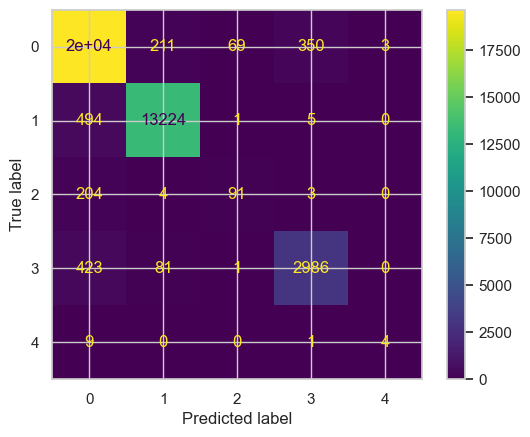

In [29]:
# visualizing the confusion matrix
disp_cm_log_reg_ovr = ConfusionMatrixDisplay(cm_log_reg_ovr)
disp_cm_log_reg_ovr.plot()
plt.savefig("../../artifacts/cm_pre_hyp_log_reg_ovr.png")
plt.show()

In [30]:
# precision score
precision_score_log_reg_ovr = precision_score(y_test, y_test_pred_log_reg_ovr, average = "weighted")
precision_score_log_reg_ovr

0.9492872205377034

In [31]:
# recall score
recall_score_log_reg_ovr = recall_score(y_test, y_test_pred_log_reg_ovr, average = "weighted")
recall_score_log_reg_ovr

0.9508070918232336

In [32]:
# f1 score
f1_score_log_reg_ovr = f1_score(y_test, y_test_pred_log_reg_ovr, average = "weighted")
f1_score_log_reg_ovr

0.9495836251560775

In [33]:
# classification report
classification_report_log_reg_ovr = classification_report(y_test, y_test_pred_log_reg_ovr)
print(classification_report_log_reg_ovr)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     20259
           1       0.98      0.96      0.97     13724
           2       0.56      0.30      0.39       302
           3       0.89      0.86      0.87      3491
           4       0.57      0.29      0.38        14

    accuracy                           0.95     37790
   macro avg       0.79      0.67      0.71     37790
weighted avg       0.95      0.95      0.95     37790



In [34]:
# knn classifier

In [35]:
# model training
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = "manhattan")
knn_classifier.fit(x_train_scaled, y_train)

KNeighborsClassifier(metric='manhattan')

In [36]:
# predicting using the training data
y_train_pred_knn_classifier = knn_classifier.predict(x_train_scaled)
y_train_pred_knn_classifier

array([0, 1, 1, ..., 1, 3, 1])

In [37]:
# predicting using the testing data
y_test_pred_knn_classifier = knn_classifier.predict(x_test_scaled)
y_test_pred_knn_classifier

array([0, 0, 0, ..., 0, 1, 1])

In [38]:
# accuracy score of prediction using the training data
train_accuracy_knn_classifier = accuracy_score(y_train, y_train_pred_knn_classifier)
train_accuracy_knn_classifier

0.9970626372753976

In [39]:
# accuracy score of prediction using the testing data
test_accuracy_knn_classifier = accuracy_score(y_test, y_test_pred_knn_classifier)
test_accuracy_knn_classifier

0.9955543794654671

In [40]:
# confusion matrix
cm_knn_classifier = confusion_matrix(y_test, y_test_pred_knn_classifier)
cm_knn_classifier

array([[20186,    14,    22,    35,     2],
       [   19, 13705,     0,     0,     0],
       [   26,     0,   276,     0,     0],
       [   38,     1,     0,  3452,     0],
       [   11,     0,     0,     0,     3]])

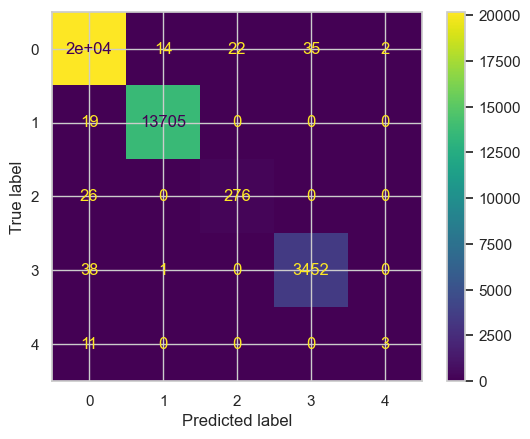

In [41]:
# visualizing the confusion matrix
disp_cm_knn_classifier = ConfusionMatrixDisplay(cm_knn_classifier)
disp_cm_knn_classifier.plot()
plt.savefig("../../artifacts/cm_pre_hyp_knn_classifier.png")
plt.show()

In [42]:
# precision score
precision_score_knn_classifier = precision_score(y_test, y_test_pred_knn_classifier, average = "weighted")
precision_score_knn_classifier

0.9954526994697411

In [43]:
# recall score
recall_score_knn_classifier = recall_score(y_test, y_test_pred_knn_classifier, average = "weighted")
recall_score_knn_classifier

0.9955543794654671

In [44]:
# f1 score
f1_score_knn_classifier = f1_score(y_test, y_test_pred_knn_classifier, average = "weighted")
f1_score_knn_classifier

0.9954691881446602

In [45]:
# classification report
classification_report_knn_classifier = classification_report(y_test, y_test_pred_knn_classifier)
print(classification_report_knn_classifier)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20259
           1       1.00      1.00      1.00     13724
           2       0.93      0.91      0.92       302
           3       0.99      0.99      0.99      3491
           4       0.60      0.21      0.32        14

    accuracy                           1.00     37790
   macro avg       0.90      0.82      0.84     37790
weighted avg       1.00      1.00      1.00     37790



In [46]:
# decision tree classifier

In [47]:
# model training
dt_classifier = DecisionTreeClassifier(criterion = "entropy", max_depth = 5)
dt_classifier.fit(x_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [48]:
# predicting using the training data
y_train_pred_dt_classifier = dt_classifier.predict(x_train_scaled)
y_train_pred_dt_classifier

array([0, 1, 1, ..., 1, 3, 1])

In [49]:
# predicting using the testing data
y_test_pred_dt_classifier = dt_classifier.predict(x_test_scaled)
y_test_pred_dt_classifier

array([0, 0, 0, ..., 0, 1, 1])

In [50]:
# accuracy score of prediction using the training data
train_accuracy_dt_classifier = accuracy_score(y_train, y_train_pred_dt_classifier)
train_accuracy_dt_classifier

0.9871523459207706

In [51]:
# accuracy score of prediction using the testing data
test_accuracy_dt_classifier = accuracy_score(y_test, y_test_pred_dt_classifier)
test_accuracy_dt_classifier

0.9855517332627679

In [52]:
# confision matrix
cm_dt_classifier = confusion_matrix(y_test, y_test_pred_dt_classifier)
cm_dt_classifier

array([[20113,    34,    44,    68,     0],
       [   23, 13618,     0,    83,     0],
       [   64,     1,   230,     7,     0],
       [  171,    37,     0,  3283,     0],
       [   12,     0,     0,     2,     0]])

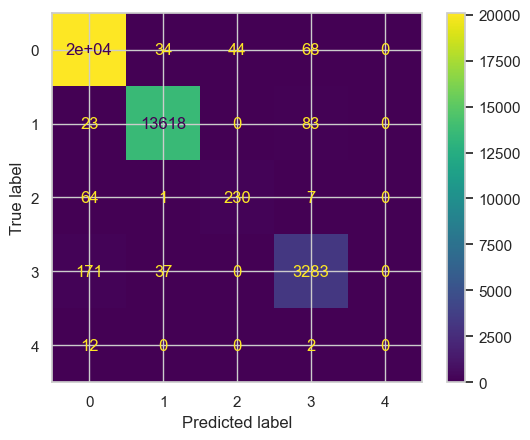

In [53]:
# visualizing the confusion matrix
disp_cm_dt_classifier = ConfusionMatrixDisplay(cm_dt_classifier)
disp_cm_dt_classifier.plot()
plt.savefig("../../artifacts/cm_pre_hyp_dt_classifier.png")
plt.show()

In [54]:
# precision score
precision_score_dt_classifier = precision_score(y_test, y_test_pred_dt_classifier, average = "weighted")
precision_score_dt_classifier

0.9850419890288755

In [55]:
# recall score
recall_score_dt_classifier = recall_score(y_test, y_test_pred_dt_classifier, average = "weighted")
recall_score_dt_classifier

0.9855517332627679

In [56]:
# f1 score
f1_score_dt_classifier = f1_score(y_test, y_test_pred_dt_classifier, average = "weighted")
f1_score_dt_classifier

0.9852720578130865

In [57]:
# classification report
classification_report_dt_classifier = classification_report(y_test, y_test_pred_dt_classifier)
print(classification_report_dt_classifier)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20259
           1       0.99      0.99      0.99     13724
           2       0.84      0.76      0.80       302
           3       0.95      0.94      0.95      3491
           4       0.00      0.00      0.00        14

    accuracy                           0.99     37790
   macro avg       0.75      0.74      0.75     37790
weighted avg       0.99      0.99      0.99     37790



In [58]:
# bagging: random forest classifier

In [59]:
# model training
rf_classifier = RandomForestClassifier(criterion = "entropy", max_depth = 5)
rf_classifier.fit(x_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5)

In [60]:
# prediction using the training data
y_train_pred_rf_classifier = rf_classifier.predict(x_train_scaled)
y_train_pred_rf_classifier

array([0, 1, 1, ..., 1, 3, 1])

In [61]:
# prediction using the testing data
y_test_pred_rf_classifier = rf_classifier.predict(x_test_scaled)
y_test_pred_rf_classifier

array([0, 0, 0, ..., 0, 1, 1])

In [62]:
# accuracy score of prediction using the training data
train_accuracy_rf_classifier = accuracy_score(y_train, y_train_pred_rf_classifier)
train_accuracy_rf_classifier

0.9830770859244754

In [63]:
# accuracy score of prediction using the testing data
test_accuracy_rf_classifier = accuracy_score(y_test, y_test_pred_rf_classifier)
test_accuracy_rf_classifier

0.9824292140777984

In [64]:
# confusion matrix
cm_rf_classifier = confusion_matrix(y_test, y_test_pred_rf_classifier)
cm_rf_classifier

array([[20244,     3,     0,    12,     0],
       [  151, 13572,     0,     1,     0],
       [  301,     1,     0,     0,     0],
       [  162,    19,     0,  3310,     0],
       [   14,     0,     0,     0,     0]])

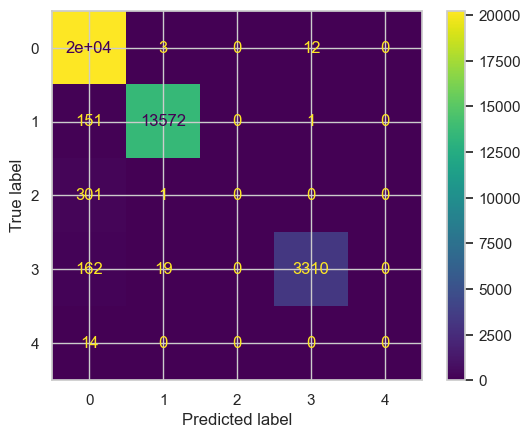

In [65]:
# visualizing the confusion matrix
disp_cm_rf_classifier = ConfusionMatrixDisplay(cm_rf_classifier)
disp_cm_rf_classifier.plot()
plt.savefig("../../artifacts/cm_pre_hyp_rf_classifier.png")
plt.show()

In [66]:
# precision score
precision_score_rf_classifier = precision_score(y_test, y_test_pred_rf_classifier, average = "weighted")
precision_score_rf_classifier

0.9745321132687279

In [67]:
# recall score
recall_score_rf_classifier = recall_score(y_test, y_test_pred_rf_classifier, average = "weighted")
recall_score_rf_classifier

0.9824292140777984

In [68]:
# f1 score
f1_score_rf_classifier = f1_score(y_test, y_test_pred_rf_classifier, average = "weighted")
f1_score_rf_classifier

0.9783007882197706

In [69]:
# classification report
classification_report_rf_classifier = classification_report(y_test, y_test_pred_rf_classifier)
print(classification_report_rf_classifier)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     20259
           1       1.00      0.99      0.99     13724
           2       0.00      0.00      0.00       302
           3       1.00      0.95      0.97      3491
           4       0.00      0.00      0.00        14

    accuracy                           0.98     37790
   macro avg       0.59      0.59      0.59     37790
weighted avg       0.97      0.98      0.98     37790



In [70]:
# boosting: gradient boosting classifier

In [71]:
# model training
gbdt_classifier = GradientBoostingClassifier(loss = "log_loss", max_depth = 5)
gbdt_classifier.fit(x_train_scaled, y_train)

GradientBoostingClassifier(max_depth=5)

In [72]:
# predicting using the training data
y_train_pred_gbdt_classifier = gbdt_classifier.predict(x_train_scaled)
y_train_pred_gbdt_classifier

array([0, 1, 1, ..., 1, 3, 1])

In [73]:
# predicting using the testing data
y_test_pred_gbdt_classifier = gbdt_classifier.predict(x_test_scaled)
y_test_pred_gbdt_classifier

array([0, 0, 0, ..., 0, 1, 1])

In [74]:
# accuracy score of prediction using the training data
train_accuracy_gbdt_classifier = accuracy_score(y_test, y_test_pred_gbdt_classifier)
train_accuracy_gbdt_classifier

0.997618417570786

In [75]:
# accuracy score of prediction using the testing data
test_accuracy_gbdt_classifier = accuracy_score(y_test, y_test_pred_gbdt_classifier)
test_accuracy_gbdt_classifier

0.997618417570786

In [76]:
# confusion matrix
cm_gbdt_classifier = confusion_matrix(y_test, y_test_pred_gbdt_classifier)
cm_gbdt_classifier

array([[20220,     5,     5,    12,    17],
       [    2, 13722,     0,     0,     0],
       [   17,     0,   285,     0,     0],
       [   17,     2,     0,  3472,     0],
       [    9,     0,     3,     1,     1]])

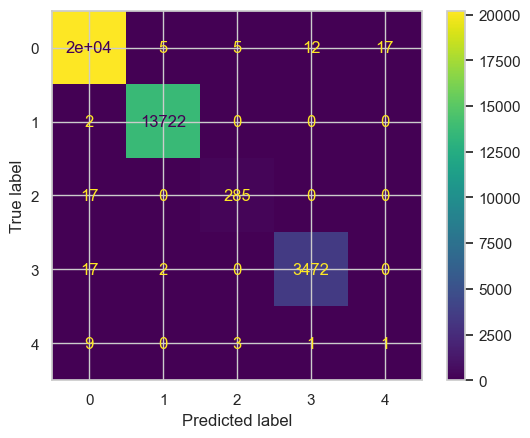

In [77]:
# visualizing the confusion matrix
disp_cm_gbdt_classifier = ConfusionMatrixDisplay(cm_gbdt_classifier)
disp_cm_gbdt_classifier.plot()
plt.savefig("../../artifacts/cm_pre_hyp_gbdt_classifier.png")
plt.show()

In [78]:
# precision score
precision_score_gbdt_classifier = precision_score(y_test, y_test_pred_gbdt_classifier, average = "weighted")
precision_score_gbdt_classifier

0.9977117103775073

In [79]:
# recall score
recall_score_gbdt_classifier = recall_score(y_test, y_test_pred_gbdt_classifier, average = "weighted")
recall_score_gbdt_classifier

0.997618417570786

In [80]:
# f1 score
f1_score_gbdt_classifier = f1_score(y_test, y_test_pred_gbdt_classifier, average = "weighted")
f1_score_gbdt_classifier

0.9976628526335427

In [81]:
# classification report
classification_report_gbdt_classifier = classification_report(y_test, y_test_pred_gbdt_classifier)
print(classification_report_gbdt_classifier)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20259
           1       1.00      1.00      1.00     13724
           2       0.97      0.94      0.96       302
           3       1.00      0.99      1.00      3491
           4       0.06      0.07      0.06        14

    accuracy                           1.00     37790
   macro avg       0.80      0.80      0.80     37790
weighted avg       1.00      1.00      1.00     37790



In [82]:
# support vector classifier

In [83]:
# model training
sv_classifier = SVC(kernel = "poly")
sv_classifier.fit(x_train_scaled, y_train)

SVC(kernel='poly')

In [84]:
# predicting using the training data
y_train_pred_sv_classifier = sv_classifier.predict(x_train_scaled)
y_train_pred_sv_classifier

array([0, 1, 1, ..., 1, 3, 1])

In [85]:
# predicting using the testing data
y_test_pred_sv_classifier = sv_classifier.predict(x_test_scaled)
y_test_pred_sv_classifier

array([0, 0, 0, ..., 0, 1, 1])

In [86]:
# accuracy score of prediction using the training data
train_accuracy_sv_classifier = accuracy_score(y_train, y_train_pred_sv_classifier)
train_accuracy_sv_classifier

0.9833814072878351

In [87]:
# accuracy score of prediction using the testing data
test_accuracy_sv_classifier = accuracy_score(y_test, y_test_pred_sv_classifier)
test_accuracy_sv_classifier

0.9820852077269119

In [88]:
# confusion matrix
cm_sv_classifier = confusion_matrix(y_test, y_test_pred_sv_classifier)
cm_sv_classifier

array([[20119,    25,    31,    80,     4],
       [  266, 13457,     0,     1,     0],
       [   58,     0,   244,     0,     0],
       [  193,     6,     2,  3290,     0],
       [   11,     0,     0,     0,     3]])

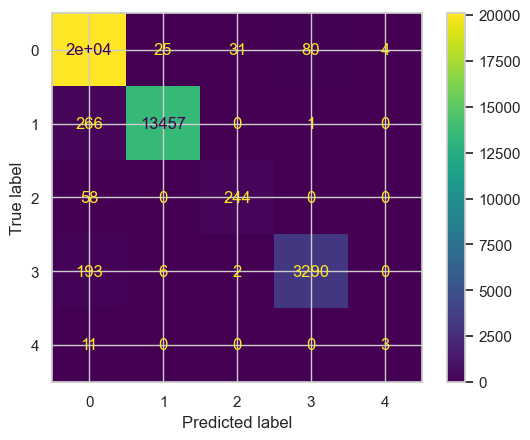

In [89]:
# visualizing the confusion matrix
disp_cm_sv_classifier = ConfusionMatrixDisplay(cm_sv_classifier)
disp_cm_sv_classifier.plot()
plt.savefig("../../artifacts/cm_pre_hyp_sv_classifier.png")
plt.show()

In [90]:
# precision score
precision_score_sv_classifier = precision_score(y_test, y_test_pred_sv_classifier, average = "weighted")
precision_score_sv_classifier

0.9820724543927609

In [91]:
# recall score
recall_score_sv_classifier = recall_score(y_test, y_test_pred_sv_classifier, average = "weighted")
recall_score_sv_classifier

0.9820852077269119

In [92]:
# f1 score
f1_score_sv_classifier = f1_score(y_test, y_test_pred_sv_classifier, average = "weighted")
f1_score_sv_classifier

0.9819514546768053

In [93]:
# classification report
classification_report_sv_classifier = classification_report(y_test, y_test_pred_sv_classifier)
print(classification_report_sv_classifier)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     20259
           1       1.00      0.98      0.99     13724
           2       0.88      0.81      0.84       302
           3       0.98      0.94      0.96      3491
           4       0.43      0.21      0.29        14

    accuracy                           0.98     37790
   macro avg       0.85      0.79      0.81     37790
weighted avg       0.98      0.98      0.98     37790



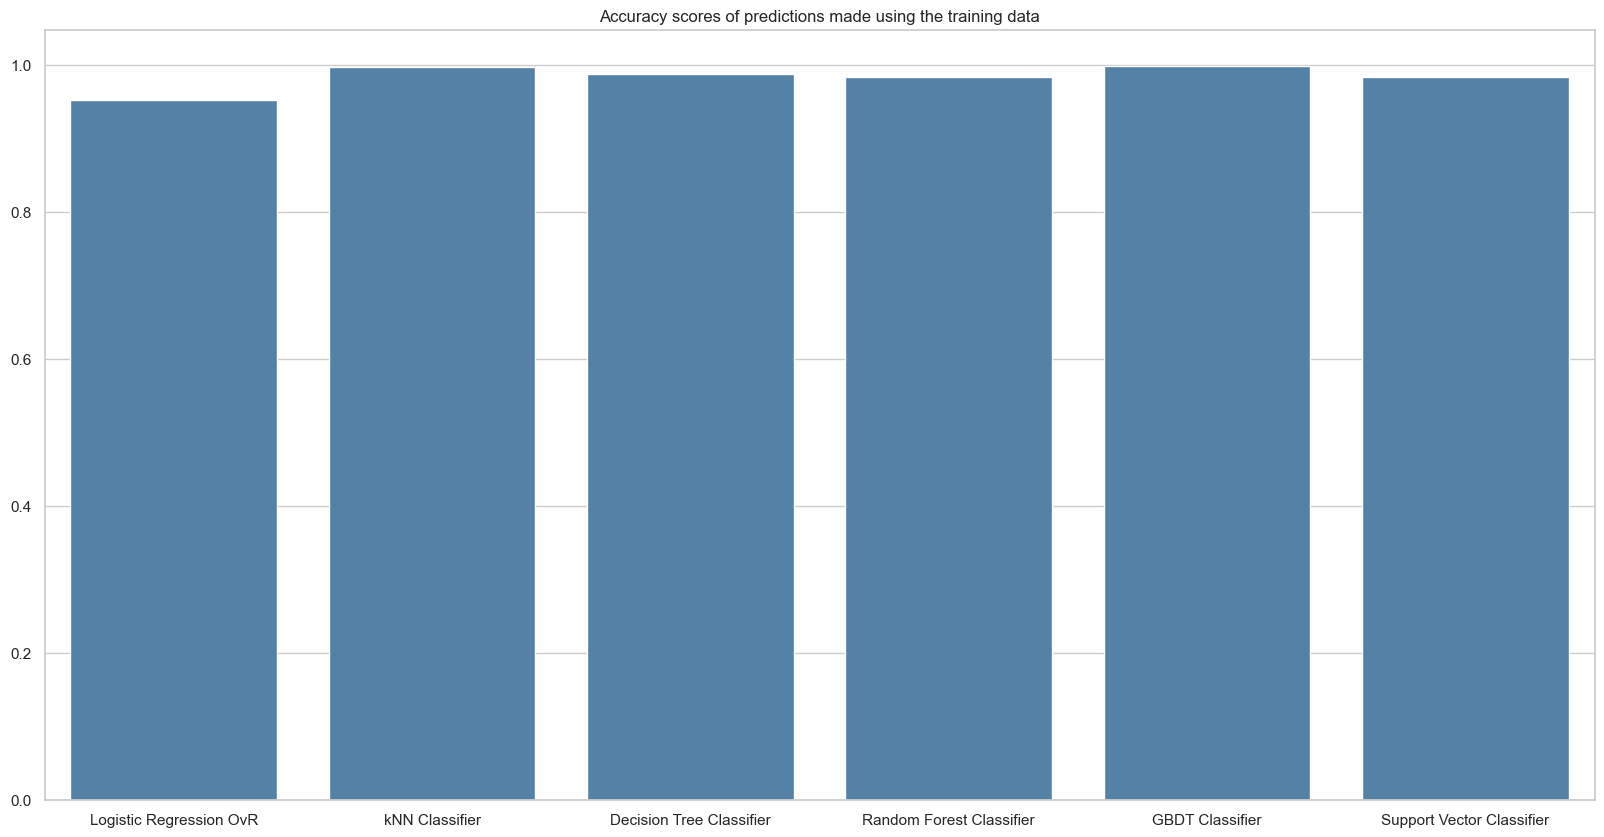

In [94]:
# comparison of accuracy scores of different models of predictions made using the training data
model_names = [
    "Logistic Regression OvR",
    "kNN Classifier",
    "Decision Tree Classifier",
    "Random Forest Classifier",
    "GBDT Classifier",
    "Support Vector Classifier"
]
values = [
    train_accuracy_log_reg_ovr,
    train_accuracy_knn_classifier,
    train_accuracy_dt_classifier,
    train_accuracy_rf_classifier,
    train_accuracy_gbdt_classifier, 
    train_accuracy_sv_classifier
]
plt.figure(figsize = (20, 10))
plt.title("Accuracy scores of predictions made using the training data")
sns.barplot(x = model_names, y = values, color = "steelblue")
plt.savefig("../../artifacts/pre_hyp_train_accuracy_scores.png")
plt.show()

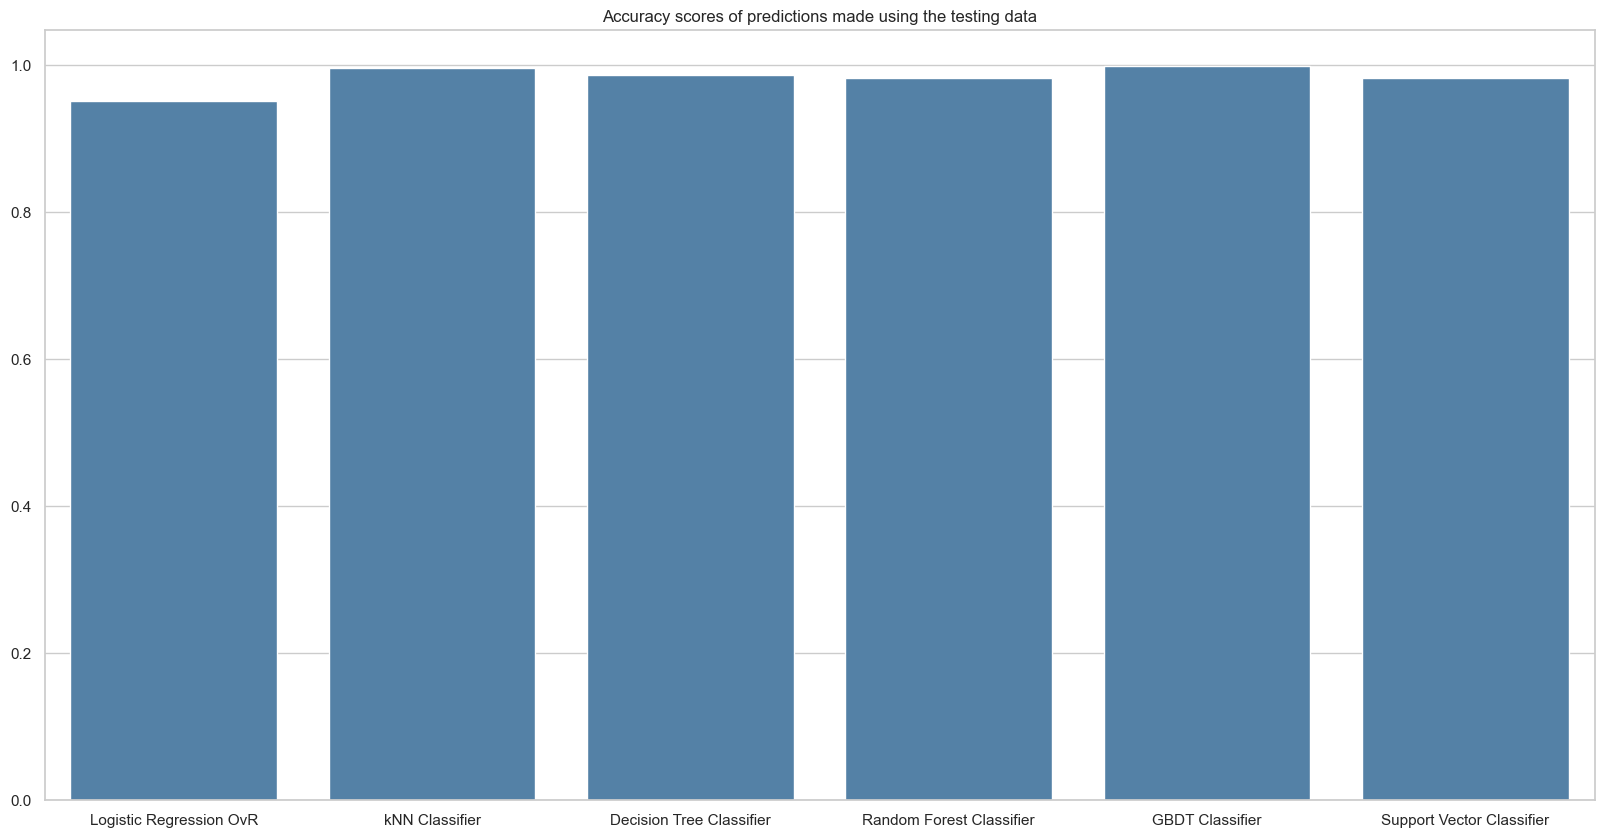

In [95]:
# comparison of accuracy scores of different models of predictions made using the testing data
model_names = [
    "Logistic Regression OvR",
    "kNN Classifier",
    "Decision Tree Classifier",
    "Random Forest Classifier",
    "GBDT Classifier",
    "Support Vector Classifier"
]
values = [
    test_accuracy_log_reg_ovr,
    test_accuracy_knn_classifier,
    test_accuracy_dt_classifier,
    test_accuracy_rf_classifier,
    test_accuracy_gbdt_classifier, 
    test_accuracy_sv_classifier
]
plt.figure(figsize = (20, 10))
plt.title("Accuracy scores of predictions made using the testing data")
sns.barplot(x = model_names, y = values, color = "steelblue")
plt.savefig("../../artifacts/pre_hyp_test_accuracy_scores.png")
plt.show()

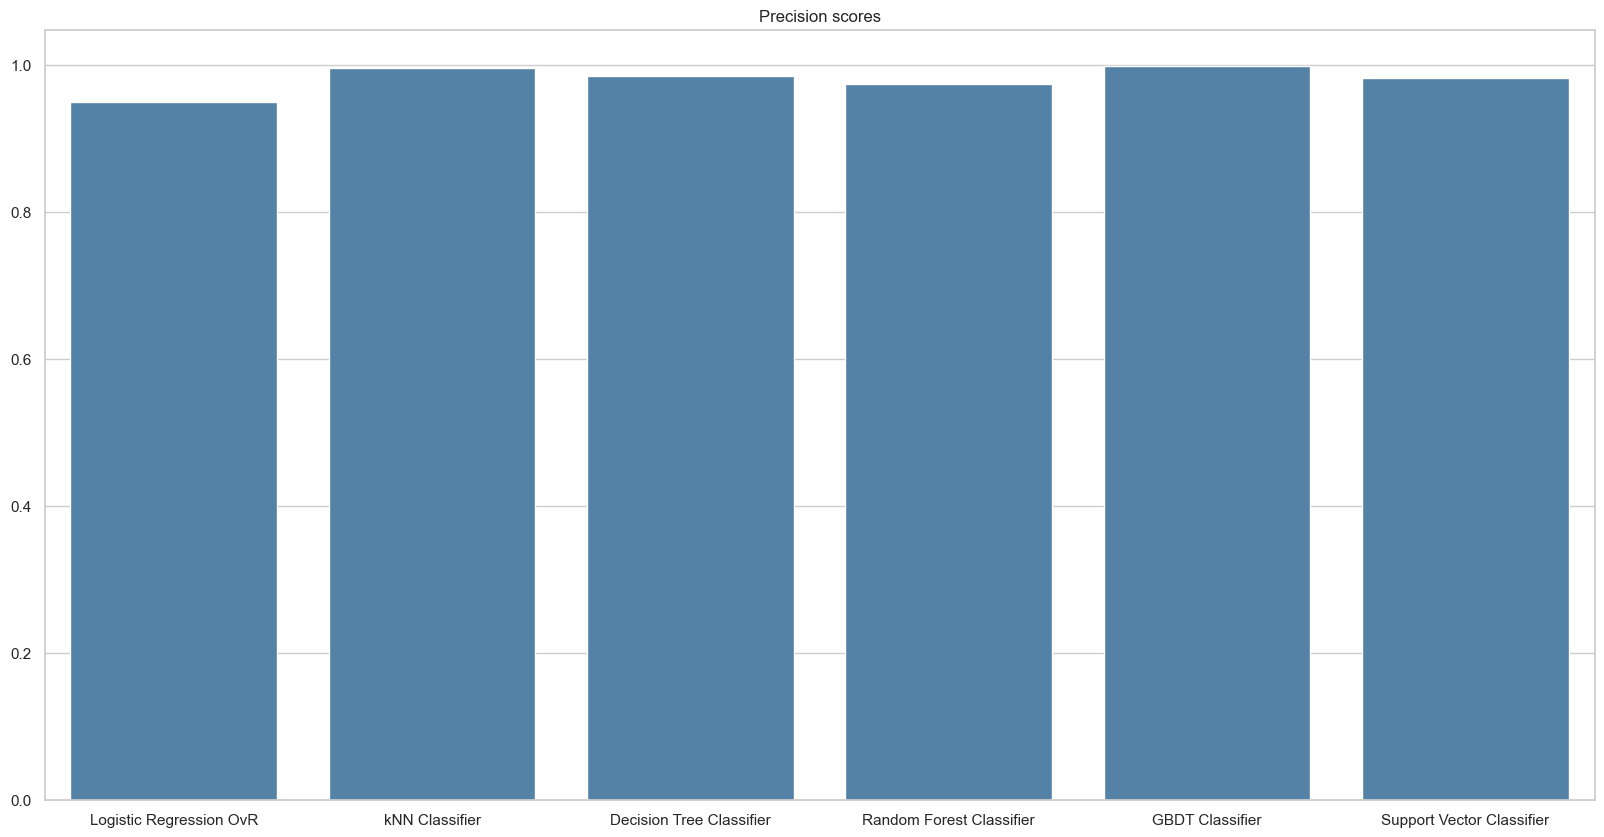

In [96]:
# comparison of precision scores
model_names = [
    "Logistic Regression OvR",
    "kNN Classifier",
    "Decision Tree Classifier",
    "Random Forest Classifier",
    "GBDT Classifier",
    "Support Vector Classifier"
]
values = [
    precision_score_log_reg_ovr,
    precision_score_knn_classifier,
    precision_score_dt_classifier,
    precision_score_rf_classifier,
    precision_score_gbdt_classifier, 
    precision_score_sv_classifier
]
plt.figure(figsize = (20, 10))
plt.title("Precision scores")
sns.barplot(x = model_names, y = values, color = "steelblue")
plt.savefig("../../artifacts/pre_hyp_precision_scores.png")
plt.show()

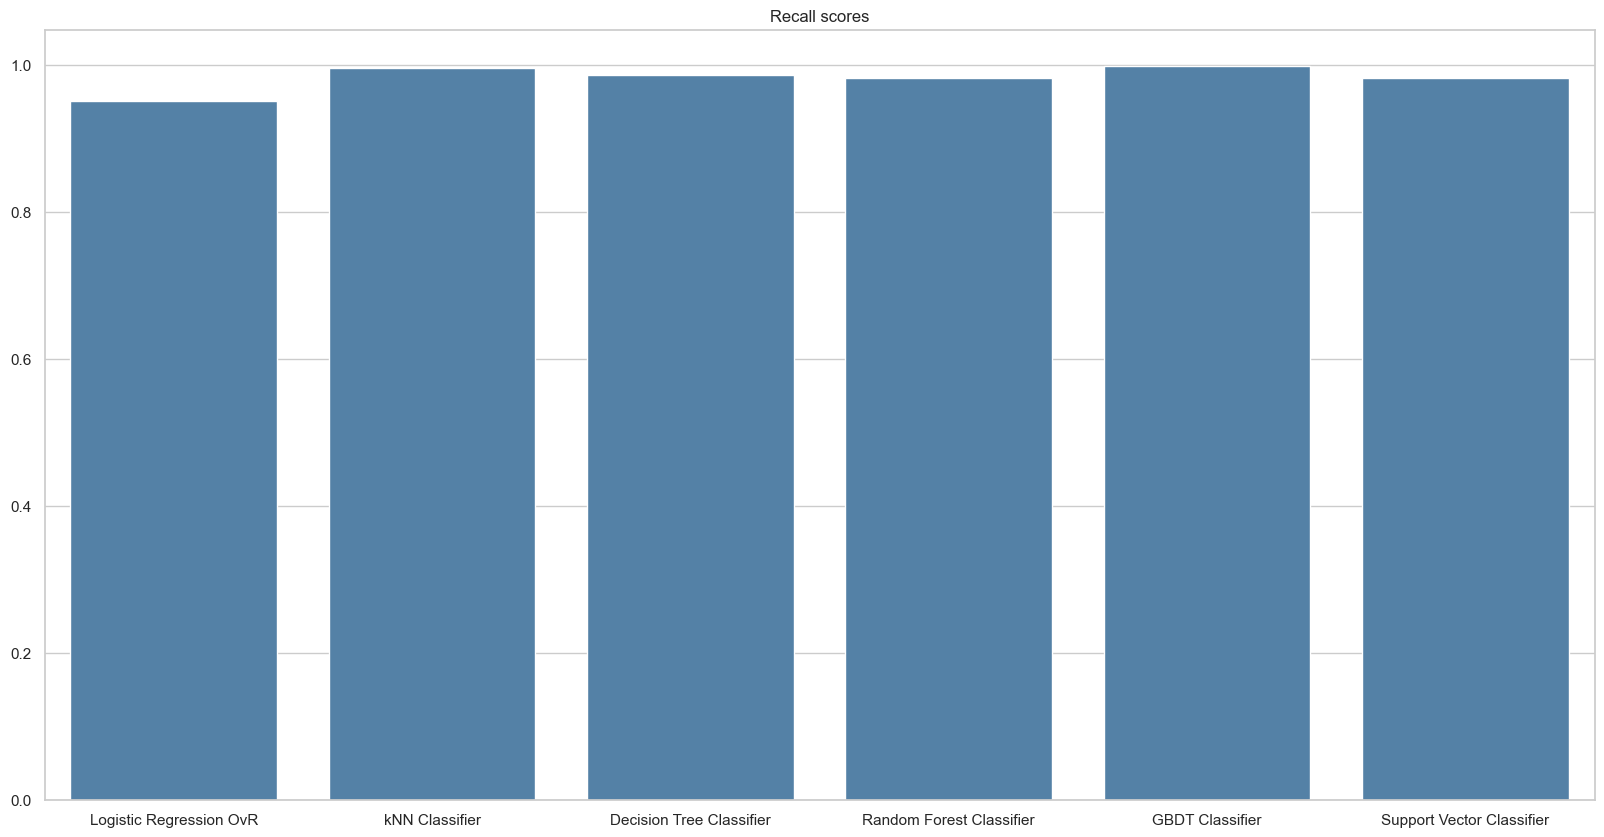

In [97]:
# comparison of recall scores
model_names = [
    "Logistic Regression OvR",
    "kNN Classifier",
    "Decision Tree Classifier",
    "Random Forest Classifier",
    "GBDT Classifier",
    "Support Vector Classifier"
]
values = [
    recall_score_log_reg_ovr,
    recall_score_knn_classifier,
    recall_score_dt_classifier,
    recall_score_rf_classifier,
    recall_score_gbdt_classifier, 
    recall_score_sv_classifier
]
plt.figure(figsize = (20, 10))
plt.title("Recall scores")
sns.barplot(x = model_names, y = values, color = "steelblue")
plt.savefig("../../artifacts/pre_hyp_recall_scores.png")
plt.show()

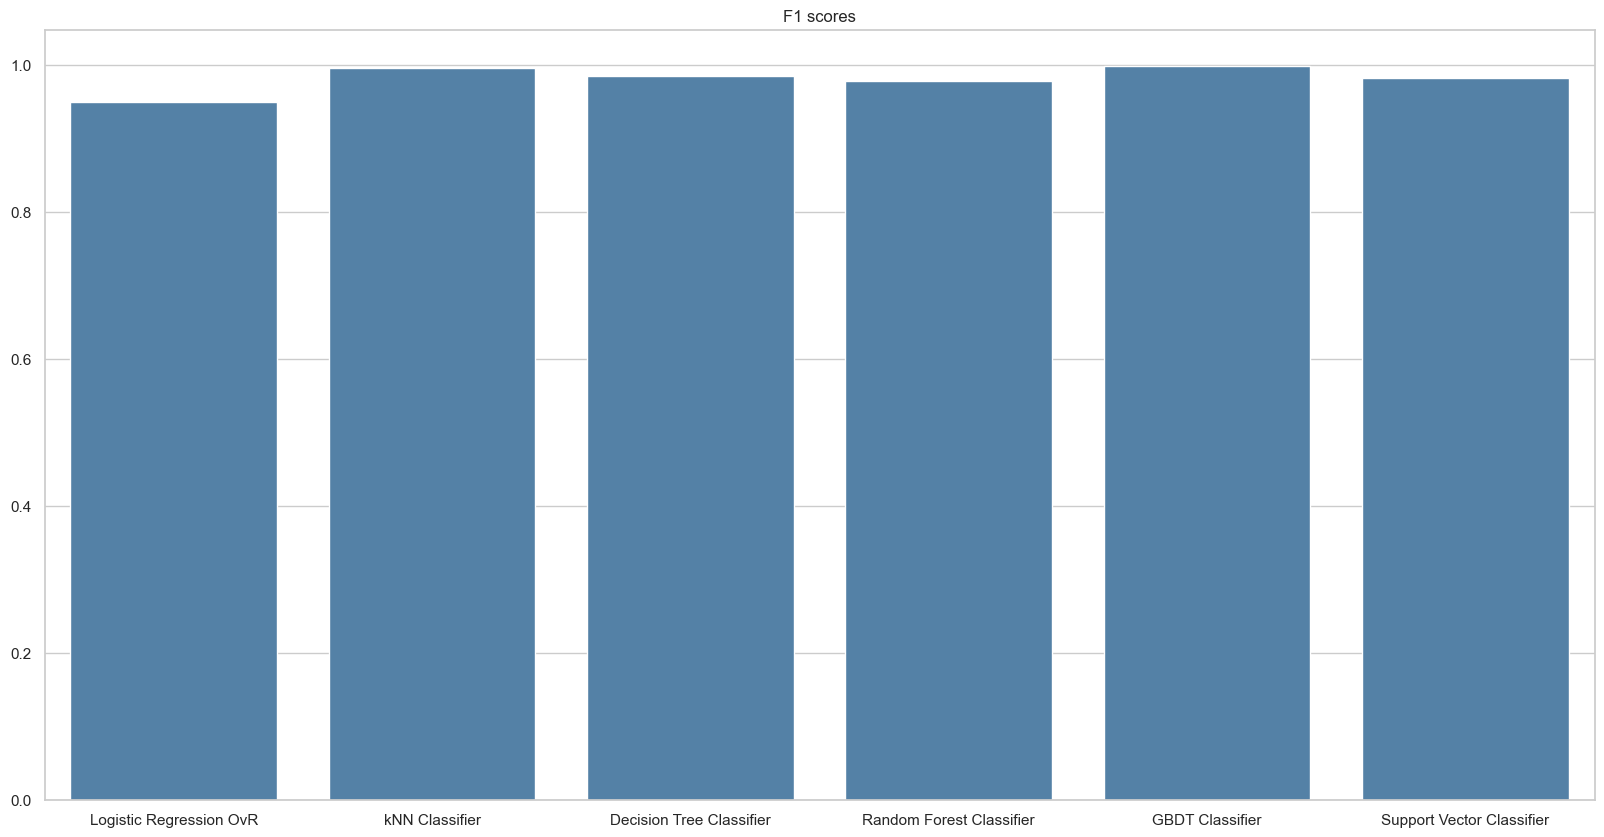

In [98]:
# comparison of f1 scores
model_names = [
    "Logistic Regression OvR",
    "kNN Classifier",
    "Decision Tree Classifier",
    "Random Forest Classifier",
    "GBDT Classifier",
    "Support Vector Classifier"
]
values = [
    f1_score_log_reg_ovr,
    f1_score_knn_classifier,
    f1_score_dt_classifier,
    f1_score_rf_classifier,
    f1_score_gbdt_classifier, 
    f1_score_sv_classifier
]
plt.figure(figsize = (20, 10))
plt.title("F1 scores")
sns.barplot(x = model_names, y = values, color = "steelblue")
plt.savefig("../../artifacts/pre_hyp_f1_scores.png")
plt.show()